# **Desempenho de algoritmos**


* A atividade proposta consiste em avaliar a complexidade de tempo de dois
algoritmos no contexto de buscas em uma Árvore de Busca Binária (BST). O algoritmo solver_closest retorna o valor mais próximo presente na árvore com base em um alvo, enquanto o solver_kth_largest encontra o k-ésimo maior valor em uma árvore dada. Os algoritmos e a boa parte da análise estatística foram disponibilizadas.

### **BST**

In [5]:

class Node:
    """
    A class representing a node in a binary search tree.

    Attributes:
    - value: the value of the node
    - left_child: the left child of the node
    - right_child: the right child of the node
    """

    def __init__(self, value):
        """
        Initializes a new instance of the Node class.

        Args:
        - value: the value of the node
        """
        self.value = value
        self.left_child = None
        self.right_child = None


class BST:
    """
    A class representing a binary search tree.

    Attributes:
    - root: the root node of the tree
    """

    def __init__(self):
        """
        Initializes a new instance of the BST class.
        """
        self.root = None

    def add(self, value):
        """
        Adds a new node with the given value to the tree.

        Args:
        - value: the value of the node to add
        """
        if self.root is None:
            # The root does exist yet, create it
            self.root = Node(value)
        else:
            # Find the right place and insert new value
            self._add_recursive(self.root, value)

    def _add_recursive(self, current_node, value):
        """
        A helper method to recursively traverse the tree and find the correct position to add the new node.

        Args:
        - current_node: the current node to traverse
        - value: the value of the node to add
        """
        if value <= current_node.value:
            # Go to the left
            if current_node.left_child is None:
                current_node.left_child = Node(value)
            else:
                self._add_recursive(current_node.left_child, value)
        else:
            # Go to the right
            if current_node.right_child is None:
                current_node.right_child = Node(value)
            else:
                self._add_recursive(current_node.right_child, value)

    def _contains(self, current_node, value):
        """
        A helper method to recursively traverse the tree and find the node with the given value.

        Args:
        - current_node: the current node to traverse
        - value: the value to search for

        Returns:
        - True if a node with the given value is found, False otherwise
        """
        if current_node is None:
            return False
        if current_node.value == value:
            return True
        if value < current_node.value:
            return self._contains(current_node.left_child, value)
        return self._contains(current_node.right_child, value)

    def contains(self, value):
        """
        Checks whether a node with the given value is present in the tree.

        Args:
        - value: the value to search for

        Returns:
        - True if a node with the given value is found, False otherwise
        """
        return self._contains(self.root, value)

  Definindo as funçoes *solver_closest*, *solver_kth_largest* e auxiliares.




In [6]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from scipy.stats import t

def findClosestValue(tree, target):
    """
    Finds the value in a binary search tree that is closest to the given target value.

    This function begins the search for the closest value from the root of the binary search tree.
    It works by recursively (or sequentially) exploring the tree, narrowing down the search based on the target value
    and the current node's value. The closest value is constantly updated throughout the search process.

    Parameters:
    tree (BinarySearchTree): The binary search tree object in which to find the closest value.
                             It is expected to have a 'root' attribute that points to the root node of the tree.
    target (int or float): The target value for which the closest value in the binary search tree is sought.

    Returns:
    int or float: The value in the binary search tree that is closest to the target value.
    """
    return findClosestValueInBstHelper(tree.root, target, tree.root.value)


def findClosestValueInBstHelper(node, target, closest):
    if node is None:
        return closest
    if abs(target - closest) > abs(target - node.value):
        closest = node.value
    if target < node.value:
        return findClosestValueInBstHelper(node.left_child, target, closest)
    elif target > node.value:
        return findClosestValueInBstHelper(node.right_child, target, closest)
    else:
        return closest


def solver_closest(arr, k):

    return findClosestValue(bst, k)


def findKthLargestValue(tree, k):
    """
    Finds the kth largest integer in a Binary Search Tree (BST).

    The function traverses the BST in an in-order manner to collect the node values in a sorted list.
    It then returns the kth largest value from this list. The BST is assumed to contain only integer values.
    In case of duplicate integers, they are treated as distinct values.
    The kth largest integer is determined in the context of these distinct values.

    Parameters:
    tree (BST): the Binary Search Tree (BST).
    k (int): A positive integer representing the kth position.

    Returns:
    int: The kth largest integer present in the BST.
    """
    sortedNodeValues = []
    inOrderTraverse(tree.root, sortedNodeValues)
    return sortedNodeValues[len(sortedNodeValues) - k]


def inOrderTraverse(node, sortedNodeValues):
    if node is None:
        return

    inOrderTraverse(node.left_child, sortedNodeValues)
    sortedNodeValues.append(node.value)
    inOrderTraverse(node.right_child, sortedNodeValues)


def solver_kth_largest(arr, target):

    return findKthLargestValue(arr, target)


### Metodologia


Os algoritmos são executados repetidamente para diferentes tamanhos de árvore, com o objetivo de obter uma medição mais consistente do tempo de execução, minimizando as interferências causadas pela troca de contexto e interrupções do sistema operacional. Para suavizar os resultados e, ao mesmo tempo, manter informações sobre as variações no tempo observado, foi estabelecido um intervalo de confiança de 95%, utilizando a distribuição de Student.

Configuraçoes:

* O número de execuções para cada etapa aumentou para 15
* O intervalo dos dados para a árvore foi alterado para o dobro do tamanho da iteração atual, a fim de evitar valores repetidos em árvores maiores.
* Os valores 10 e 15 foram escolhidos como parâmetros de teste para os algoritmos.

In [7]:
# Configurações
np.random.seed(42) # Garante a reprodutibilidade dos Resultados
N = 100000  # Tamanho máximo do vetor
steps = 10  # Número de tamanhos de vetor a testar
executions_per_size = 15  # Número de execuções por tamanho de vetor

# Tamanhos dos vetores a testar
vector_sizes = np.linspace(100, N, steps, dtype=int)

# Preparação para coleta de dados
results_closest = []
results_kth_largest = []
confidence_intervals_closest = []
confidence_intervals_kth_largest = []

# Testar os algoritmos
for size in vector_sizes:
    times_closest = []
    times_kth_largest = []

    for _ in range(executions_per_size):
        data = np.random.randint(0,2*size, size)
        bst = BST()
        for value in data:
          bst.add(value)

        # Medir tempo para solver_closest
        start = time()
        solver_closest(bst, 10)
        times_closest.append(time() - start)

        # Medir tempo para solver_kth_largest
        start = time()
        solver_kth_largest(bst, 15)
        times_kth_largest.append(time() - start)

    # Calcular médias e intervalos de confiança (95%)
    mean_closest = np.mean(times_closest)
    mean_kth_largest = np.mean(times_kth_largest)
    std_closest = np.std(times_closest, ddof=1)
    std_kth_largest = np.std(times_kth_largest, ddof=1)
    ci_closest = t.ppf(0.975, executions_per_size-1) * (std_closest / np.sqrt(executions_per_size))
    ci_kth_largest = t.ppf(0.975, executions_per_size-1) * (std_kth_largest / np.sqrt(executions_per_size))

    results_closest.append(mean_closest)
    results_kth_largest.append(mean_kth_largest)
    confidence_intervals_closest.append(ci_closest)
    confidence_intervals_kth_largest.append(ci_kth_largest)


## Resultado

Os gráficos a seguir apresentam o tempo de execução de ambos os algoritmos testados. O primeiro mostra a comparação entre os algoritmos, enquanto o segundo foca especificamente no desempenho do Algoritmo de Valor Mais Próximo, permitindo uma visualização mais clara de seu comportamento, sem que este seja impactado pela escala.

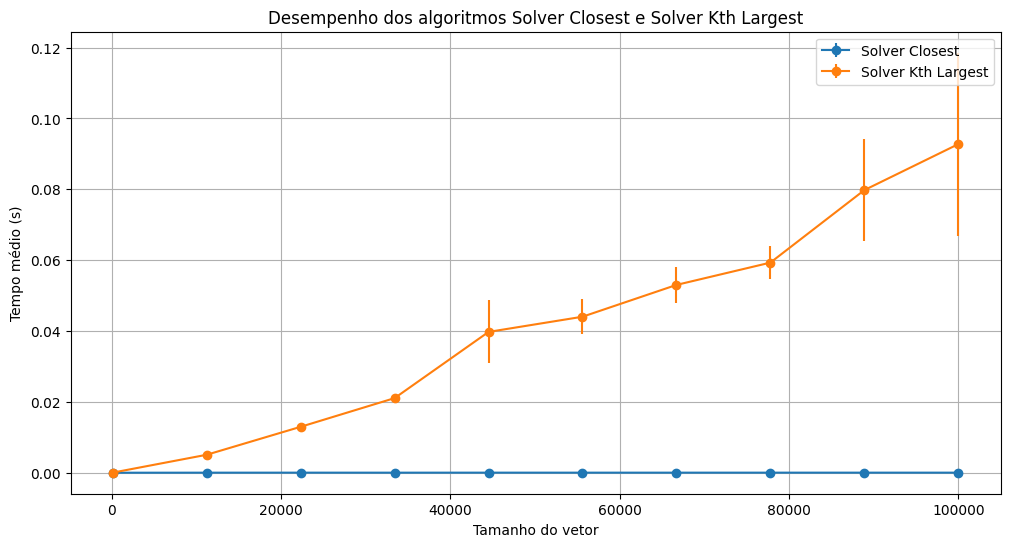

In [8]:

# Gerar gráfico
plt.figure(figsize=(12, 6))
plt.errorbar(vector_sizes, results_closest, yerr=confidence_intervals_closest, label='Solver Closest', fmt='-o')
plt.errorbar(vector_sizes, results_kth_largest, yerr=confidence_intervals_kth_largest, label='Solver Kth Largest', fmt='-o')
plt.xlabel('Tamanho do vetor')
plt.ylabel('Tempo médio (s)')
plt.title('Desempenho dos algoritmos Solver Closest e Solver Kth Largest')
plt.legend()
plt.grid(True)
plt.show()

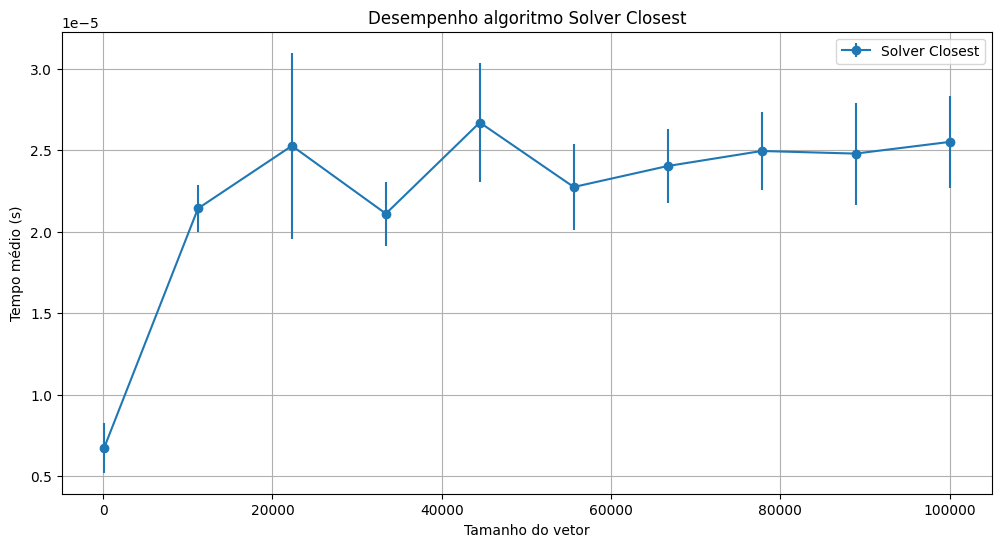

In [9]:

# Gerar gráfico
plt.figure(figsize=(12, 6))
plt.errorbar(vector_sizes, results_closest, yerr=confidence_intervals_closest, label='Solver Closest', fmt='-o')
plt.xlabel('Tamanho do vetor')
plt.ylabel('Tempo médio (s)')
plt.title('Desempenho algoritmo Solver Closest')
plt.legend()
plt.grid(True)
plt.show()